#Tytuł: Rozpoznawanie Cyferek
Wiktor Oczkoś\
Przetwarzanie danych w Biznesie\




#Problem badawczy:
Czy prosty model machine learning'owy potrafi zidentyfikować cyfry używając danych pobranych z bazy MNIST?

#Opis metody:

W tym projekcie zdecydowałem się użyć paczek tensorflow/keras do zamodelowania, trenowania i predykcji. Dodatkowo użyłem paczek numpy i matplotlib, żeby lepiej zwizualizować dane.

#Dane wejściowe:


Dane wejściowe zostały pobrane z MNIST dataset, który okazał się być dostępny w kerasowych datasetach.\
Podział danych: \
- Część treningowa: 60000
- Część testowa: 10000 \

Każdy obraz jest w formacie 28x28 pikseli


In [2]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [12]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


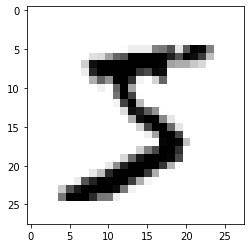

In [11]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

#Implementacja metody:

In [19]:
from keras.utils.np_utils import normalize
#x_train = x_train / 255
#x_test = x_test / 255

x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=0)
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Accuracy: 97.329998


#Ocena i dyskusja:

313/313 [==============================] - 0s 1ms/step


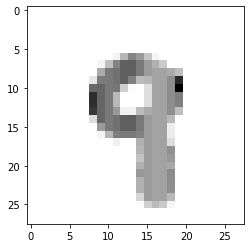

Predicted: 9
Actual: 9


In [29]:
y_pred=model.predict(x_test)
y_pred_num=np.argmax(y_pred, axis=1)

id = np.random.choice(len(y_pred))

plt.imshow(x_test[id], cmap=plt.cm.binary)
plt.show()

print("Predicted: "+str(y_pred_num[id]))
print("Actual: "+str(y_test[id]))


Jak widzimy model sprawdza się całkiem nieźle.\
Wynik accuracy około 97% jest bardzo zadowalający i rzeczywiście model poprawnie przewiduje cyferki.\
Chciałem zaimplementować dodatkowo możliwość własnego rysowania cyferek, lecz nie starczyło na to czasu :( \
Dodatkowo można rozważyć tutaj użycie innych layerów takich jak Conv2D, który na pewno nadałby się do takiego projektu.


#Referencje:

- https://www.youtube.com/watch?v=VwVg9jCtqaU&t=1637s
- https://www.tensorflow.org/datasets/catalog/mnist